# Relationship of Free Throw Percentage of NBA Players by Position and Games Played

#### By Tony DiRubbo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR

## Introduction

The following analysis is treated as the sequel to analysis of the 2020-2021 NBA season conducted in R. The goal of this analysis was to see if there were continuing trends based on the comments made in the conclusion section of the previous analysis. The previous analysis can be found below:

https://adirubbo13.github.io/NBA20202021SeasonAnalysisR.html

The National Basketball Association (NBA) itself is a sports league heavily rested in its statistics. Websites such as basketball-reference.com provide a cornucopia of basketball related data which users can obtain starting from the founding years of the NBA. The link below leads to the player statistical totals for the last complete NBA Season (2021-2022), from there the data can be exported to CSV format.

https://www.basketball-reference.com/leagues/NBA_2022_totals.html

The data field contains the total statistics for every NBA player for the 2021-2022 NBA season. This includes variables ranging from points scored to minutes played. Each of the 540 players who played in the league during this season is an observational unit for this study, none of the players will be removed from the data field. The entire population of NBA players who played at least one game this season will be examined.

The response variable is a player's total free throw percentage. This is being changed from field goal percentage from the previous analysis using R, as there are too many uncontrollable variables when the game of basketball is in motion. The research question being asked is if a player’s free throw percentage is possibly affected by the position of that player and/or the number of games that player played.

In [2]:
df = pd.read_csv('20212022NBATotals.csv')
df = df[['Player','Pos','G','FT%']]
df = df.rename(
    columns={
        'Pos':'Position',
        'G':'GamesPlayed',
        'FT%':'FreeThrowPercentage',
    })
df

,Player,Position,GamesPlayed,FreeThrowPercentage
0,Precious Achiuwa,C,73,0.595
1,Steven Adams,C,76,0.543
2,Bam Adebayo,C,56,0.753
3,Santi Aldama,PF,32,0.625
4,LaMarcus Aldridge,C,47,0.873
...,...,...,...,...
541,Thaddeus Young,PF,52,0.469
542,Trae Young,PG,76,0.904
543,Omer Yurtseven,C,56,0.623
544,Cody Zeller,C,27,0.776


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player               546 non-null    object 
 1   Position             546 non-null    object 
 2   GamesPlayed          546 non-null    int64  
 3   FreeThrowPercentage  546 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 12.9+ KB


In [4]:
df.head

<bound method NDFrame.head of                 Player Position  GamesPlayed  FreeThrowPercentage
0     Precious Achiuwa        C           73                0.595
1         Steven Adams        C           76                0.543
2          Bam Adebayo        C           56                0.753
3         Santi Aldama       PF           32                0.625
4    LaMarcus Aldridge        C           47                0.873
..                 ...      ...          ...                  ...
541     Thaddeus Young       PF           52                0.469
542         Trae Young       PG           76                0.904
543     Omer Yurtseven        C           56                0.623
544        Cody Zeller        C           27                0.776
545        Ivica Zubac        C           76                0.727

[546 rows x 4 columns]>

The chunk above imports the data field and then cleans the data, so the only variables looked at are player name, position, games played, and the players field goal percentage.  The structure of the data is printed as well as the first five rows of the new data field. 

## Descriptive Statistics

Descriptive statistics are conducted below which will give us a quick glance and various features of the two numerical variables being examined: number of games played and free throw percentage.

In [5]:
df.describe()

,GamesPlayed,FreeThrowPercentage
count,546.000000,546.000000
mean,47.238095,0.747626
std,23.555013,0.148856
min,1.000000,0.000000
25%,29.000000,0.681000
50%,52.000000,0.767500
75%,67.000000,0.842000
max,82.000000,1.000000


A histogram and box plot for free throw percentage, our response variable, is also generated below. These allow the shape of the variable to be examined, both plots indicate a strong left skew.

Text(0.5, 0, 'Free Throw Percentage')

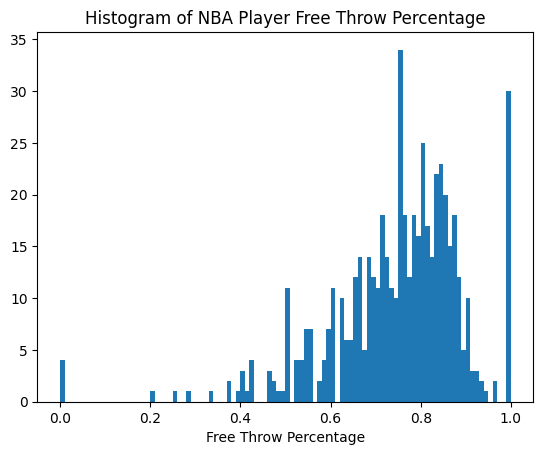

In [6]:
plt.hist(df['FreeThrowPercentage'],bins=100)
plt.title('Histogram of NBA Player Free Throw Percentage')
plt.xlabel('Free Throw Percentage')

Text(0.5, 0, 'Free Throw Percentage')

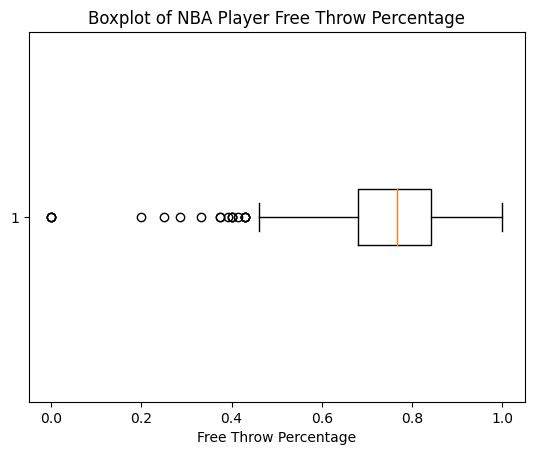

In [7]:
plt.boxplot(df['FreeThrowPercentage'],vert=False)
plt.title('Boxplot of NBA Player Free Throw Percentage')
plt.xlabel('Free Throw Percentage')

## Free Throw Percentage by Position

Free throw percentage can now be compared to by position. Boxplots using the pandas and matplotlib packages are shown. Both plots inndicate that guards have the highest free throw percentages, whereas as you go down the field from shooting guard to center, field goal percentages will decrease.

### Using Pandas

Text(0.5, 0, 'Free Throw Percentage')

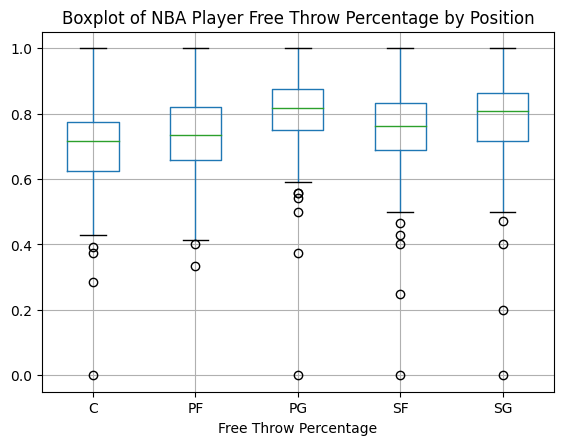

In [8]:
df.boxplot(column = 'FreeThrowPercentage', by = 'Position') #Pandas Boxplot not Matplotlib
plt.suptitle('') #Clears out pregenerated title
plt.title('Boxplot of NBA Player Free Throw Percentage by Position')
plt.xlabel('Free Throw Percentage')

### Using Matplotlib

Text(0.5, 0, 'Free Throw Percentage')

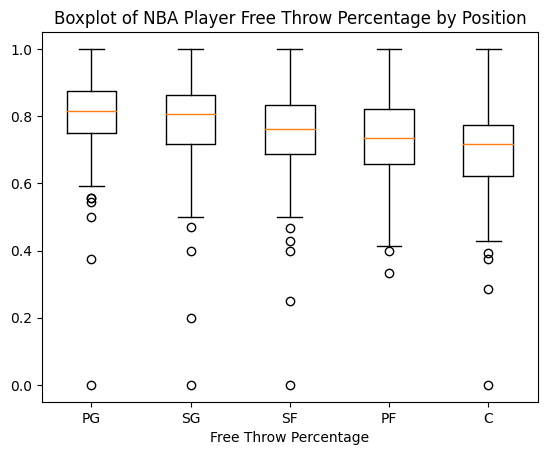

In [9]:
PointGuard = df.loc[df['Position']=='PG','FreeThrowPercentage'].values #isolates the variables by position type
ShootingGuard = df.loc[df['Position']=='SG','FreeThrowPercentage'].values
SmallForward = df.loc[df['Position']=='SF','FreeThrowPercentage'].values
PowerForward = df.loc[df['Position']=='PF','FreeThrowPercentage'].values
Center = df.loc[df['Position']=='C','FreeThrowPercentage'].values

plt.boxplot([PointGuard,ShootingGuard,SmallForward,PowerForward,Center],labels=['PG','SG','SF','PF','C'])
plt.title('Boxplot of NBA Player Free Throw Percentage by Position')
plt.xlabel('Free Throw Percentage')

## Free Throw Percentage vs Games Played

The following scatter plot highlights the second research question as free throw Percentage is compared with games played. The  scatter plot and trendline identify two different ideas. The trendline suggests a linear relation, however the scatterplot suggests that while generally the players with more games played are stronger field goal shooters, there is not as strong of a relationship as there are various data points where players have field goal percentages and low amounts of games played. This is most likely because there are various other factors which indicates of a player is going to play more games than another player.

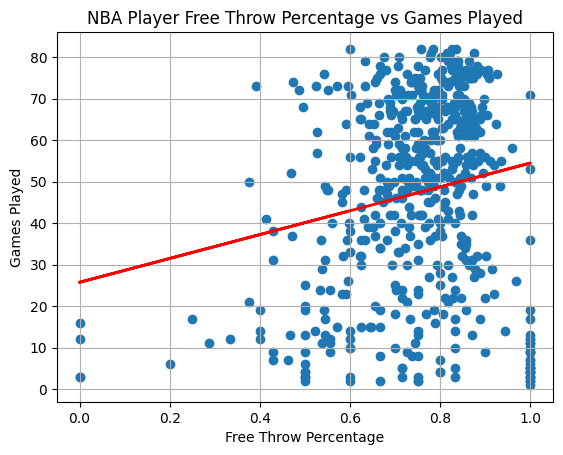

In [10]:
plt.scatter(df['FreeThrowPercentage'],df['GamesPlayed'])
plt.title('NBA Player Free Throw Percentage vs Games Played')
plt.xlabel('Free Throw Percentage')
plt.ylabel('Games Played')
plt.grid(True)
x = df['FreeThrowPercentage'].values.reshape(-1, 1)
y = df['GamesPlayed'].values
model = LR().fit(x, y)
plt.plot(x, model.predict(x), color='red', linewidth=2)

## Conclusion

After completing the statistical procedures, both variables indicated some sort of relation. The average free throw percentage from guards and non-guards was found to be different from one another. Generally as a player’s number of games played increased, a player’s free throw percentage increased as well.

During this project I learned a lot about the similaries and differences of data anlysis with Python and R to solve various problems. I am glad that I was able to use a project like this in order to learn how to conduct data analysis with the Python programming language. This method of using the Jupyter Notebook software definitely made presenting my information a lot easier to implement, and hopefully made my report a lot easier to read. 